In [3]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import numpy as np
import pickle
import scipy

from utils import utils
import utils.efinet as efinet
#from keras.utils.np_utils import to_categorical
import tensorflow as tf

In [82]:
# Load and
# concat data
with open("../tests/data/Hydro/MotherShip2.pkl", "rb") as f:
    labels = pickle.load(f)

with open("../tests/data/GADF_prepared/GADF_5s_MotherShip2.pkl", "rb") as f:
    gadf = pickle.load(f)

gcn = scipy.io.loadmat("../tests/data/GCN_prepared/GCN_MotherShip2.mat")
gcn = np.transpose(gcn["cause5s"], (0, 2, 3, 1))

result = []
for i in range(len(gadf)):
    result.append(gcn[i] + gadf[i])

data = np.array(result)

print("Data shape: ", np.shape(data))

Data shape:  (1457, 32, 32, 3)


In [83]:
%%capture
_, eval_model = efinet.build_graph([32, 32, 3], 2)
eval_model.load_weights(f"../results/models/WESAD_5s.h5")

# Predict the values from the validation dataset
pred = eval_model.predict(data)

In [65]:
# probs = pd.DataFrame(pred[0])
# df = pd.DataFrame({
#     "label": labels.label.values,
#     "end": labels.end.values,
#     "pred": probs[1],
#     "id": "Lander4"
# })
# df.to_csv("Lander4_1s.csv", index=False)
labels

,ECG,RSP,EDA,label,start,end,segment
0,"[-0.10553363389360051, -0.0567083915766646, 0....","[0.4697768121972327, 0.4761098539776632, 0.482...","[-3.7542692897406726, -3.770494320839729, -3.7...",GONGO,1661090461,1661090780,0
1,"[-0.42613689869065513, -0.4313707514386413, -0...","[0.8325945140008675, 0.8337414244032914, 0.834...","[-4.98787780548517, -4.9874498016421285, -4.98...",GONGO,1661090461,1661090780,0
2,"[-0.3592351094052267, -0.36565851002289085, -0...","[0.6743192498129644, 0.6762221979331144, 0.678...","[0.21508428425083553, 0.21648821735477455, 0.2...",GONGO,1661090461,1661090780,0
3,"[-0.7288739416781161, -0.8287358926308953, -0....","[-6.006962509805776, -5.986471227702612, -5.96...","[2.1428405734377605, 2.146546916033839, 2.1501...",GONGO,1661090461,1661090780,0
4,"[0.4821825691984367, 0.5297843982255305, 0.611...","[3.2740185836673423, 3.334079965247834, 3.3944...","[-0.28726746665566627, -0.29130850146281073, -...",GONGO,1661090461,1661090780,0
...,...,...,...,...,...,...,...
87,"[-0.0924645776616076, -1.8806162901700727, -3....","[0.2782064678401502, 0.26840864719574525, 0.25...","[-0.4337888468404563, -0.43713242953433756, -0...",SAT66,1661453666,1661454128,37
88,"[-0.12427271769740593, -0.1652288810746541, -0...","[0.5935714451499652, 0.6062646296728547, 0.618...","[-0.42418865162966835, -0.4179014362008312, -0...",SAT66,1661453666,1661454128,37
89,"[0.25386068805089795, 0.2256342117727028, 0.17...","[-1.5663864031179142, -1.5680870063207863, -1....","[-0.9080211903723967, -0.9261127132792065, -0....",SAT66,1661453666,1661454128,37
90,"[-0.19160361149965885, -0.21424246939991326, -...","[-0.9644927836322366, -0.9703737874587081, -0....","[0.17335498821836845, 0.17910532627997822, 0.1...",SAT66,1661453666,1661454128,37


In [67]:
import scienceplots
plt.style.use("science")

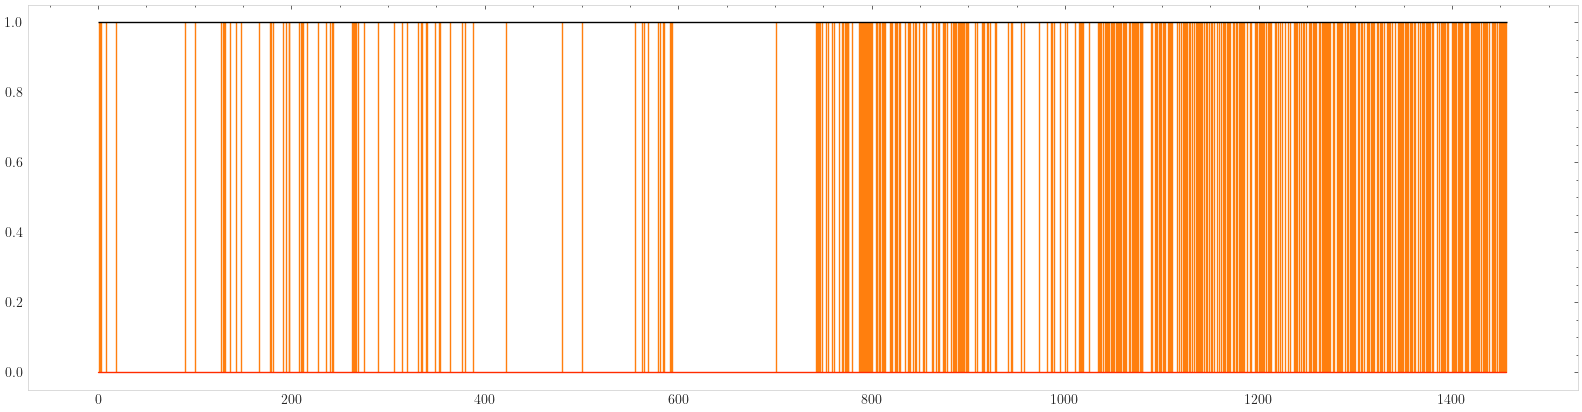

In [91]:
plt.rcParams["figure.figsize"] = (20, 5)
probs = pd.DataFrame(pred[0])
# plt.stem(np.arange(0, len(labels)), labels.label, markerfmt="")
plt.stem(probs[1] > 0.5, "#ff7f0e", markerfmt="")
# plt.stem(probs[0] > 0., "#1f77b4", markerfmt="")

# plt.stem(probs[0].rolling(10).mean() - 0.2, "#1f77b4", markerfmt="")
# plt.stem(probs[1], "#ff7f0e", markerfmt="")

# plt.hlines(0.5, 0, len(labels), "k")
plt.hlines(1, 0, len(labels), "k")
plt.grid()

plt.savefig(f"mothership_test.pdf", format="png", bbox_inches="tight", dpi=600)